In [4]:
import pandas as pd
import numpy as np

In [5]:
data= pd.read_csv('data_324.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
pd.set_option('display.max_columns', None)
data.head()

,isca,caid,Vin,Year,Make,Model,Trim,Mileage,Date,MIDMapAlgorithm,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Velocity,Salesefficiency,AvgDaysToSell,vol_tier,availability,inventory,spread_current,buyer_how_paid_cd,floorplan_cur_cust_nm,floorplan_cust_ovc_id,NGC_purchase_price,NGC_floored_amount,wholesale_price,MMR_price,list_price,price,cost,revenue,profit,profitability,NGC_total_floored,wallet_share,count_vin,count_vin_for_wallet_share,count_vin_floored,count_vin_floored_by_NGC
0,1,CA11197380,1GTR2VE7XCZ218323,2012,GMC,Sierra 1500,Truck,NaN,2019-10-30,Exact,11750.0,16600.0,13051.0,116676.0,Warm,0.494258,15.0,Tier3,Medium,61.0,4850.0,NaN,NaN,NaN,NaN,NaN,NaN,11750.0,NaN,16600.0,37900.0,48050.0,10150.0,0.211238,0.0,0.0,3,3.0,0.0,0.0
1,1,CA11197380,2HGFB6E50DH705377,2013,Honda,Civic,Other,NaN,2019-10-12,Exact,10150.0,13900.0,7138.0,92944.0,Hot,0.685657,19.0,Tier2,Medium,140.0,3750.0,NaN,NaN,NaN,NaN,NaN,NaN,10150.0,NaN,13900.0,37900.0,48050.0,10150.0,0.211238,0.0,0.0,3,3.0,0.0,0.0
2,1,CA11197380,5NPE34AF5GH274704,2016,Hyundai,Sonata,Sedan,19310.0,2019-10-20,Exact,16000.0,17550.0,11112.0,44270.0,Cold,0.693079,21.0,Tier1,Low,502.0,1550.0,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,17550.0,37900.0,48050.0,10150.0,0.211238,0.0,0.0,3,3.0,0.0,0.0
3,1,CA11197386,19XFA1F59AE046628,2010,Honda,Civic,LX,79889.0,2019-08-21,Exact,4225.0,7225.0,3671.0,127175.0,Hot,0.731679,12.0,Tier3,Low,51.0,3000.0,Check,NaN,NaN,NaN,NaN,5700.0,5700.0,NaN,7225.0,5903300.0,6464402.0,561102.0,0.086799,0.0,0.0,242,212.0,0.0,0.0
4,1,CA11197386,19XFB2F55DE031146,2013,Honda,Civic,LX,80827.0,2019-08-21,Exact,7075.0,9950.0,7138.0,92944.0,Hot,0.685657,19.0,Tier2,Medium,140.0,2875.0,Check,NaN,NaN,NaN,NaN,7600.0,7600.0,NaN,9950.0,5903300.0,6464402.0,561102.0,0.086799,0.0,0.0,242,212.0,0.0,0.0


In [7]:
data.columns

Index(['isca', 'caid', 'Vin', 'Year', 'Make', 'Model', 'Trim', 'Mileage',
       'Date', 'MIDMapAlgorithm', 'MMR_adj_current', 'RMI_adj_current',
       'AvgPrice', 'avgmiles', 'Velocity', 'Salesefficiency', 'AvgDaysToSell',
       'vol_tier', 'availability', 'inventory', 'spread_current',
       'buyer_how_paid_cd', 'floorplan_cur_cust_nm', 'floorplan_cust_ovc_id',
       'NGC_purchase_price', 'NGC_floored_amount', 'wholesale_price',
       'MMR_price', 'list_price', 'price', 'cost', 'revenue', 'profit',
       'profitability', 'NGC_total_floored', 'wallet_share', 'count_vin',
       'count_vin_for_wallet_share', 'count_vin_floored',
       'count_vin_floored_by_NGC'],
      dtype='object')

In [8]:
data=data.loc[:,['isca','caid', 'Vin', 'Year', 'Make', 'Mileage','MMR_adj_current', 'RMI_adj_current','AvgPrice', 'avgmiles', 'Velocity', 'Salesefficiency', 'AvgDaysToSell',
       'vol_tier', 'availability', 'inventory', 'NGC_floored_amount', 'list_price','wholesale_price', 'MMR_price', 'revenue', 'cost', 'profitability','profit','NGC_total_floored','wallet_share','count_vin']]

In [9]:
data=pd.get_dummies(data=data, columns=['Velocity','vol_tier','availability'])

In [10]:
data['avg_year'] = data.groupby(['caid'])['Year'].transform(np.mean)
data['make_count'] = data.groupby(['caid'])['Make'].transform('nunique')
data['avg_milage'] = data.groupby(['caid'])['Mileage'].transform(np.mean)

In [11]:
data['avgmiles'] = data.groupby(['caid'])['avgmiles'].transform(np.mean)
data['AvgPrice'] = data.groupby(['caid'])['AvgPrice'].transform(np.mean)

In [12]:
data['Salesefficiency'] = data.groupby(['caid'])['Salesefficiency'].transform(np.mean)
data['AvgDaysToSell'] = data.groupby(['caid'])['AvgDaysToSell'].transform(np.mean)
data['inventory'] = data.groupby(['caid'])['inventory'].transform(np.mean)

In [13]:
data['MMR_adj_current'] = data.groupby(['caid'])['MMR_adj_current'].transform(np.mean)
data['RMI_adj_current'] = data.groupby(['caid'])['RMI_adj_current'].transform(np.mean)

In [14]:
data['list_price'] = data.groupby(['caid'])['list_price'].transform(np.mean)
data['MMR_price'] = data.groupby(['caid'])['MMR_price'].transform(np.mean)

In [15]:
data['wholesale_price'] = data.groupby(['caid'])['wholesale_price'].transform(np.mean)

In [16]:
data['NGC_floored_amount'] = data.groupby(['caid'])['NGC_floored_amount'].transform(np.mean)

In [17]:
data['revenue'] = data.groupby(['caid'])['revenue'].transform(np.mean)

In [18]:
data['cost'] = data.groupby(['caid'])['cost'].transform(np.mean)
data['profitability'] = data.groupby(['caid'])['profitability'].transform(np.mean)

In [19]:
data['profitability'] = data.groupby(['caid'])['profitability'].transform(np.mean)

In [20]:
data['wallet_share'].shape

(22769966,)

In [21]:
data[data.wallet_share !=0].shape

(651909, 41)

In [23]:
##category
data['Velocity_Cold'] = data.groupby(['caid'])['Velocity_Cold'].transform(np.sum)
data['Velocity_Hot'] = data.groupby(['caid'])['Velocity_Hot'].transform(np.sum)
data['Velocity_Warm'] = data.groupby(['caid'])['Velocity_Warm'].transform(np.sum)
data['vol_tier_Tier1'] = data.groupby(['caid'])['vol_tier_Tier1'].transform(np.sum)
data['vol_tier_Tier2'] = data.groupby(['caid'])['vol_tier_Tier2'].transform(np.sum)
data['vol_tier_Tier3'] = data.groupby(['caid'])['vol_tier_Tier3'].transform(np.sum)
data['vol_tier_Tier4'] = data.groupby(['caid'])['vol_tier_Tier4'].transform(np.sum)
data['vol_tier_Tier5'] = data.groupby(['caid'])['vol_tier_Tier5'].transform(np.sum)
data['availability_Excessive'] = data.groupby(['caid'])['availability_Excessive'].transform(np.sum)
data['availability_High'] = data.groupby(['caid'])['availability_High'].transform(np.sum)
data['availability_Low'] = data.groupby(['caid'])['availability_Low'].transform(np.sum)
data['availability_Medium'] = data.groupby(['caid'])['availability_Medium'].transform(np.sum)
data['availability_No Inventory'] = data.groupby(['caid'])['availability_No Inventory'].transform(np.sum)
data['availability_Other'] = data.groupby(['caid'])['availability_Other'].transform(np.sum)

In [24]:
data.head()

,isca,caid,Vin,Year,Make,Mileage,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,NGC_floored_amount,list_price,wholesale_price,MMR_price,revenue,cost,profitability,profit,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,avg_milage
0,1,CA11197380,1GTR2VE7XCZ218323,2012,GMC,NaN,12633.333333,16016.666667,10433.666667,84630.000000,0.624331,18.333333,234.333333,NaN,NaN,NaN,12633.333333,48050.0,37900.0,0.211238,10150.0,0.0,0.0,3,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2013.666667,3,19310.000000
1,1,CA11197380,2HGFB6E50DH705377,2013,Honda,NaN,12633.333333,16016.666667,10433.666667,84630.000000,0.624331,18.333333,234.333333,NaN,NaN,NaN,12633.333333,48050.0,37900.0,0.211238,10150.0,0.0,0.0,3,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2013.666667,3,19310.000000
2,1,CA11197380,5NPE34AF5GH274704,2016,Hyundai,19310.0,12633.333333,16016.666667,10433.666667,84630.000000,0.624331,18.333333,234.333333,NaN,NaN,NaN,12633.333333,48050.0,37900.0,0.211238,10150.0,0.0,0.0,3,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2013.666667,3,19310.000000
3,1,CA11197386,19XFA1F59AE046628,2010,Honda,79889.0,26992.723005,31022.123894,29009.302128,33553.957447,0.503281,18.408511,282.646809,NaN,NaN,14410.759494,27845.754717,6464402.0,5903300.0,0.086799,561102.0,0.0,0.0,242,11858.0,22990.0,22022.0,7260.0,8954.0,10406.0,23958.0,6292.0,25410.0,43.0,13.0,57.0,0.0,17.0,2017.619835,15,24672.820084
4,1,CA11197386,19XFB2F55DE031146,2013,Honda,80827.0,26992.723005,31022.123894,29009.302128,33553.957447,0.503281,18.408511,282.646809,NaN,NaN,14410.759494,27845.754717,6464402.0,5903300.0,0.086799,561102.0,0.0,0.0,242,11858.0,22990.0,22022.0,7260.0,8954.0,10406.0,23958.0,6292.0,25410.0,43.0,13.0,57.0,0.0,17.0,2017.619835,15,24672.820084


In [25]:
data=data.drop_duplicates(['caid'],keep= 'last')

In [26]:
data.head()

,isca,caid,Vin,Year,Make,Mileage,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,NGC_floored_amount,list_price,wholesale_price,MMR_price,revenue,cost,profitability,profit,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,avg_milage
2,1,CA11197380,5NPE34AF5GH274704,2016,Hyundai,19310.0,12633.333333,16016.666667,10433.666667,84630.000000,0.624331,18.333333,234.333333,NaN,NaN,NaN,12633.333333,4.805000e+04,3.790000e+04,0.211238,1.015000e+04,0.0,0.0,3,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2013.666667,3,19310.000000
244,1,CA11197386,ZACCJBCT4FPB27624,2015,Jeep,NaN,26992.723005,31022.123894,29009.302128,33553.957447,0.503281,18.408511,282.646809,NaN,NaN,14410.759494,27845.754717,6.464402e+06,5.903300e+06,0.086799,5.611020e+05,0.0,0.0,242,11858.0,22990.0,22022.0,7260.0,8954.0,10406.0,23958.0,6292.0,25410.0,43.0,13.0,57.0,0.0,17.0,2017.619835,15,24672.820084
575,1,CA11197387,WP1AG2A52HLB50755,2017,Porsche,23265.0,45102.591991,57539.038340,56054.082781,26070.062914,0.647884,21.076159,42.979933,NaN,56893.270739,67875.000000,45498.932092,9.735923e+06,8.462801e+06,0.130765,1.273122e+06,0.0,0.0,331,6289.0,72820.0,17543.0,2979.0,1986.0,19529.0,30121.0,45347.0,1655.0,108.0,43.0,136.0,3.0,7.0,2016.752266,21,21148.860669
646,1,CA11197388,YV1SW592X61534208,2006,Volvo,171647.0,3498.550725,6719.339623,4206.478873,128543.450704,0.595144,13.915493,101.171429,NaN,0.000000,NaN,3498.550725,3.561250e+05,2.414000e+05,0.322148,1.147250e+05,0.0,0.0,71,213.0,2485.0,2272.0,781.0,426.0,1775.0,852.0,1207.0,0.0,4.0,17.0,49.0,1.0,0.0,2008.422535,25,133246.704225
648,1,CA11197391,4T1B11HK4JU069300,2018,Toyota,39616.0,8850.000000,19400.000000,9144.500000,88761.500000,0.594674,13.500000,199.000000,NaN,NaN,9300.000000,18000.000000,1.940000e+04,1.800000e+04,0.072165,1.400000e+03,0.0,0.0,2,2.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,2011.500000,2,101540.000000


In [27]:
data['profitability'] = data['profit'] / data['revenue']

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
data = data.drop(['Vin','Year','Make','Mileage','list_price','wholesale_price','cost','profit','NGC_floored_amount','MMR_price'],axis=1)

In [29]:
data.head()

,isca,caid,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,avg_milage
2,1,CA11197380,12633.333333,16016.666667,10433.666667,84630.000000,0.624331,18.333333,234.333333,4.805000e+04,0.211238,0.0,0.0,3,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2013.666667,3,19310.000000
244,1,CA11197386,26992.723005,31022.123894,29009.302128,33553.957447,0.503281,18.408511,282.646809,6.464402e+06,0.086799,0.0,0.0,242,11858.0,22990.0,22022.0,7260.0,8954.0,10406.0,23958.0,6292.0,25410.0,43.0,13.0,57.0,0.0,17.0,2017.619835,15,24672.820084
575,1,CA11197387,45102.591991,57539.038340,56054.082781,26070.062914,0.647884,21.076159,42.979933,9.735923e+06,0.130765,0.0,0.0,331,6289.0,72820.0,17543.0,2979.0,1986.0,19529.0,30121.0,45347.0,1655.0,108.0,43.0,136.0,3.0,7.0,2016.752266,21,21148.860669
646,1,CA11197388,3498.550725,6719.339623,4206.478873,128543.450704,0.595144,13.915493,101.171429,3.561250e+05,0.322148,0.0,0.0,71,213.0,2485.0,2272.0,781.0,426.0,1775.0,852.0,1207.0,0.0,4.0,17.0,49.0,1.0,0.0,2008.422535,25,133246.704225
648,1,CA11197391,8850.000000,19400.000000,9144.500000,88761.500000,0.594674,13.500000,199.000000,1.940000e+04,0.072165,0.0,0.0,2,2.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,2011.500000,2,101540.000000


In [30]:
data['Wholesale_dif'] = (data['MMR_adj_current'] - data['AvgPrice']) / data['AvgPrice']
data['Retail_dif'] = (data['RMI_adj_current'] - data['AvgPrice']) / data['AvgPrice']
data['Avg_mileage_dif'] = (data['avg_milage'] - data['avgmiles']) / data['avgmiles']
data['Velocity_Cold'] = data['Velocity_Cold'] / data['count_vin']
data['Velocity_Hot'] = data['Velocity_Hot'] / data['count_vin']
data['Velocity_Warm'] = data['Velocity_Warm'] / data['count_vin']
data['vol_tier_Tier1'] = data['vol_tier_Tier1'] / data['count_vin']
data['vol_tier_Tier2'] = data['vol_tier_Tier2'] / data['count_vin']
data['vol_tier_Tier3'] = data['vol_tier_Tier3'] / data['count_vin']
data['vol_tier_Tier4'] = data['vol_tier_Tier4'] / data['count_vin']
data['vol_tier_Tier5'] = data['vol_tier_Tier5'] / data['count_vin']
data['availability_Excessive'] = data['availability_Excessive'] / data['count_vin']
data['availability_High'] = data['availability_High'] / data['count_vin']
data['availability_Low'] = data['availability_Low'] / data['count_vin']
data['availability_Medium'] = data['availability_Medium'] / data['count_vin']
data['availability_No Inventory'] = data['availability_No Inventory'] / data['count_vin']
data['availability_Other'] = data['availability_Other'] / data['count_vin']
data['avg_year'] = data['avg_year'] - 1933

In [31]:
data = data.drop(['MMR_adj_current','RMI_adj_current','avg_milage'],axis=1)

In [32]:
data.head()

,isca,caid,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif
2,1,CA11197380,10433.666667,84630.000000,0.624331,18.333333,234.333333,4.805000e+04,0.211238,0.0,0.0,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.333333,0.666667,0.000000,0.000000,80.666667,3,0.210824,0.535095,-0.771830
244,1,CA11197386,29009.302128,33553.957447,0.503281,18.408511,282.646809,6.464402e+06,0.086799,0.0,0.0,242,49.0,95.0,91.0,30.0,37.0,43.0,99.0,26.0,105.0,0.177686,0.053719,0.235537,0.000000,0.070248,84.619835,15,-0.069515,0.069385,-0.264682
575,1,CA11197387,56054.082781,26070.062914,0.647884,21.076159,42.979933,9.735923e+06,0.130765,0.0,0.0,331,19.0,220.0,53.0,9.0,6.0,59.0,91.0,137.0,5.0,0.326284,0.129909,0.410876,0.009063,0.021148,83.752266,21,-0.195374,0.026491,-0.188768
646,1,CA11197388,4206.478873,128543.450704,0.595144,13.915493,101.171429,3.561250e+05,0.322148,0.0,0.0,71,3.0,35.0,32.0,11.0,6.0,25.0,12.0,17.0,0.0,0.056338,0.239437,0.690141,0.014085,0.000000,75.422535,25,-0.168295,0.597379,0.036589
648,1,CA11197391,9144.500000,88761.500000,0.594674,13.500000,199.000000,1.940000e+04,0.072165,0.0,0.0,2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.500000,0.000000,0.500000,0.000000,0.000000,78.500000,2,-0.032205,1.121494,0.143964


In [33]:
data.describe()

,isca,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif
count,109873.000000,108706.000000,108706.000000,108706.000000,108706.000000,108583.000000,1.098730e+05,1.059310e+05,1.098730e+05,106119.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,107542.000000,105798.000000,105078.000000
mean,0.567792,16903.288893,72191.879259,0.560649,19.799829,266.869034,4.109637e+06,-inf,1.526757e+04,0.047258,207.238958,57.967854,70.199385,66.638428,55.037452,32.989024,45.043168,24.337808,41.482384,38.865454,0.196125,0.164817,0.429801,0.005172,0.038977,80.711894,9.934270,-0.073576,0.292164,-0.164116
std,0.495385,13651.697789,48796.558435,0.086019,11.368521,277.056405,2.349592e+07,NaN,2.976076e+05,0.191720,1210.741813,454.970170,328.224323,445.916009,398.012040,179.872206,242.166180,107.739147,450.969314,259.068485,0.227159,0.213686,0.326883,0.040647,0.097630,4.739997,10.197333,0.174701,0.332843,0.569475
min,0.000000,267.000000,27.000000,0.000000,1.000000,1.000000,0.000000e+00,-inf,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.984648,-0.936874,-1.000000
25%,0.000000,6706.000000,29308.187657,0.512500,14.666667,77.142857,3.960000e+04,1.238825e-01,0.000000e+00,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131579,0.000000,0.000000,77.250000,2.000000,-0.146782,0.116328,-0.349326
50%,1.000000,15668.901408,60452.859307,0.570562,17.800000,189.555556,2.537750e+05,1.674990e-01,0.000000e+00,0.000000,22.000000,3.000000,8.000000,6.000000,3.000000,3.000000,5.000000,2.000000,3.000000,0.000000,0.133333,0.100000,0.406250,0.000000,0.000000,82.000000,6.000000,-0.055312,0.195459,-0.123874
75%,1.000000,23406.312500,116750.812500,0.616074,20.615385,362.607692,2.816280e+06,3.192112e-01,0.000000e+00,0.000000,145.000000,34.000000,45.000000,42.000000,31.000000,21.000000,29.000000,14.000000,24.000000,19.000000,0.300000,0.233533,0.680000,0.000000,0.021978,84.644068,16.000000,0.009324,0.370119,0.063674
max,1.000000,273038.000000,995626.000000,1.000000,283.000000,5798.000000,4.345525e+09,9.999436e-01,7.988542e+07,1.000000,233714.000000,91270.000000,38213.000000,82534.000000,90018.000000,31819.000000,49259.000000,10350.000000,129098.000000,66688.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,65.000000,6.492795,7.107905,75.163754


In [34]:
data.isna().sum()

isca                            0
caid                            0
AvgPrice                     1167
avgmiles                     1167
Salesefficiency              1167
AvgDaysToSell                1167
inventory                    1290
revenue                         0
profitability                3942
NGC_total_floored               0
wallet_share                 3754
count_vin                       0
Velocity_Cold                   0
Velocity_Hot                    0
Velocity_Warm                   0
vol_tier_Tier1                  0
vol_tier_Tier2                  0
vol_tier_Tier3                  0
vol_tier_Tier4                  0
vol_tier_Tier5                  0
availability_Excessive          0
availability_High               0
availability_Low                0
availability_Medium             0
availability_No Inventory       0
availability_Other              0
avg_year                        0
make_count                      0
Wholesale_dif                2331
Retail_dif    

In [35]:
data = data[data.count_vin.notnull()]

In [36]:
data.shape

(109873, 31)

In [37]:
data.to_csv('0407MODEL_data.csv',index=False)

## Dealer Segmentation Model

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('0407MODEL_data.csv')

In [3]:
data.head()

,Unnamed: 0,isca,caid,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,...,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif
0,2,1,CA11197380,10433.666667,84630.000000,0.624331,18.333333,234.333333,4.805000e+04,0.211238,...,0.000000,0.333333,0.666667,0.000000,0.000000,80.666667,3,0.210824,0.535095,-0.771830
1,244,1,CA11197386,29009.302128,33553.957447,0.503281,18.408511,282.646809,6.464402e+06,0.086799,...,0.177686,0.053719,0.235537,0.000000,0.070248,84.619835,15,-0.069515,0.069385,-0.264682
2,575,1,CA11197387,56054.082781,26070.062914,0.647884,21.076159,42.979933,9.735923e+06,0.130765,...,0.326284,0.129909,0.410876,0.009063,0.021148,83.752266,21,-0.195374,0.026491,-0.188768
3,646,1,CA11197388,4206.478873,128543.450704,0.595144,13.915493,101.171429,3.561250e+05,0.322148,...,0.056338,0.239437,0.690141,0.014085,0.000000,75.422535,25,-0.168295,0.597379,0.036589
4,648,1,CA11197391,9144.500000,88761.500000,0.594674,13.500000,199.000000,1.940000e+04,0.072165,...,0.500000,0.000000,0.500000,0.000000,0.000000,78.500000,2,-0.032205,1.121494,0.143964


In [4]:
data.shape

(109873, 32)

In [5]:
data = data.dropna()

In [6]:
data.shape

(102114, 32)

In [7]:
data1 = data[data.revenue > 0]

In [8]:
data1.shape

(102114, 32)

In [9]:
import matplotlib.pyplot as plt

(array([1.02016e+05, 8.00000e+01, 9.00000e+00, 3.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.75000000e+02, 2.17276535e+08, 4.34552795e+08, 6.51829055e+08,
        8.69105315e+08, 1.08638157e+09, 1.30365783e+09, 1.52093409e+09,
        1.73821035e+09, 1.95548661e+09, 2.17276287e+09, 2.39003913e+09,
        2.60731539e+09, 2.82459165e+09, 3.04186791e+09, 3.25914417e+09,
        3.47642043e+09, 3.69369669e+09, 3.91097295e+09, 4.12824921e+09,
        4.34552547e+09]),
 <a list of 20 Patch objects>)

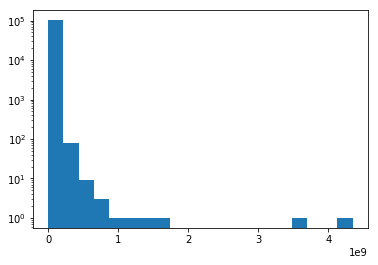

In [15]:
plt.hist(data1.revenue, bins= 20, log = True)

(array([1.02044e+05, 5.60000e+01, 5.00000e+00, 1.00000e+00, 2.00000e+00,
        2.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.0000000e+00, 1.1686650e+04, 2.3372300e+04, 3.5057950e+04,
        4.6743600e+04, 5.8429250e+04, 7.0114900e+04, 8.1800550e+04,
        9.3486200e+04, 1.0517185e+05, 1.1685750e+05, 1.2854315e+05,
        1.4022880e+05, 1.5191445e+05, 1.6360010e+05, 1.7528575e+05,
        1.8697140e+05, 1.9865705e+05, 2.1034270e+05, 2.2202835e+05,
        2.3371400e+05]),
 <a list of 20 Patch objects>)

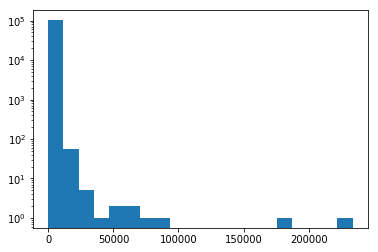

In [16]:
plt.hist(data1.count_vin, bins= 20, log = True)

(array([94725.,   444.,   344.,   343.,   330.,   273.,   268.,   241.,
          273.,   244.,   207.,   235.,   225.,   220.,   241.,   232.,
          262.,   282.,   280.,  2445.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

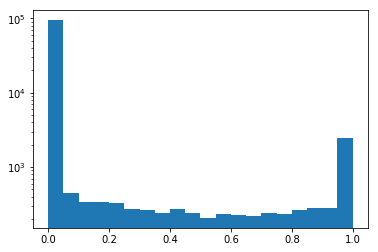

In [17]:
plt.hist(data1.wallet_share, bins= 20, log = True)

(array([1.02085e+05, 2.20000e+01, 3.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([       0.  ,  3994270.75,  7988541.5 , 11982812.25, 15977083.  ,
        19971353.75, 23965624.5 , 27959895.25, 31954166.  , 35948436.75,
        39942707.5 , 43936978.25, 47931249.  , 51925519.75, 55919790.5 ,
        59914061.25, 63908332.  , 67902602.75, 71896873.5 , 75891144.25,
        79885415.  ]),
 <a list of 20 Patch objects>)

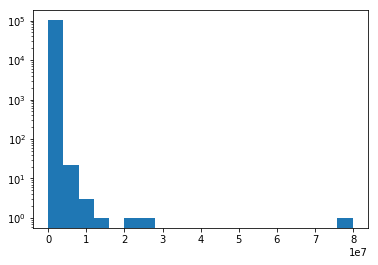

In [18]:
plt.hist(data1.NGC_total_floored, bins= 20, log = True)